## Exploratory analysis of the dependend variables

In [1]:
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist

In [2]:
data_frame_combinado = pd.read_csv('../DataIntermediate/combined_data_dep_variables.csv', sep = ',')

data_frame_combinado.head()

,id,Degree_Rede_EntreajudaLabur,Indeg_Var.Dep_RedeControlExtAusencia,Indeg_Var.Dep_ApoioSpecDiqCint,Indeg_Var.Dep_ApoioSpecTubos,Indeg_Var.Dep_RedApoiLevntDiCin,Indeg_RedCont_DiqPriqDiqCint,Indeg_RedeRepar_DiqPriqDiqCint,Indeg_Red-Val_Cont1Rep2DiqCin,Indeg_Red-Val_Cont1Rep2DiqPrq,Indeg_ContRep2_DiqPrqCin,Indeg_Var.Dep_RedePartilhaAgu
0,Aiace Quior,7,1,4,2,1,1,0,1,1,1,0
1,Alamada Bia,2,2,4,2,0,2,2,0,4,4,0
2,Alanghate Mfumba,10,1,0,0,0,2,1,0,3,3,0
3,Albat Calabus,10,0,2,0,0,2,2,0,4,4,0
4,Americano Mbunde,19,1,1,2,0,2,2,0,4,4,0


In [3]:
# Agrupar por 'id' y calcular la media (si es necesario)
data_frame_combinado_dep_grouped = data_frame_combinado.groupby('id').mean().reset_index()

# Eliminar la columna 'id' para realizar el PCA
data_for_pca = data_frame_combinado_dep_grouped.drop(columns=['id']).dropna()

data_frame_combinado_dep_grouped.dropna()


,id,Degree_Rede_EntreajudaLabur,Indeg_Var.Dep_RedeControlExtAusencia,Indeg_Var.Dep_ApoioSpecDiqCint,Indeg_Var.Dep_ApoioSpecTubos,Indeg_Var.Dep_RedApoiLevntDiCin,Indeg_RedCont_DiqPriqDiqCint,Indeg_RedeRepar_DiqPriqDiqCint,Indeg_Red-Val_Cont1Rep2DiqCin,Indeg_Red-Val_Cont1Rep2DiqPrq,Indeg_ContRep2_DiqPrqCin,Indeg_Var.Dep_RedePartilhaAgu
0,Aiace Quior,7.0,1.0,4.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
1,Alamada Bia,2.0,2.0,4.0,2.0,0.0,2.0,2.0,0.0,4.0,4.0,0.0
2,Alanghate Mfumba,10.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,3.0,3.0,0.0
3,Albat Calabus,10.0,0.0,2.0,0.0,0.0,2.0,2.0,0.0,4.0,4.0,0.0
4,Americano Mbunde,19.0,1.0,1.0,2.0,0.0,2.0,2.0,0.0,4.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
124,Vieira Bedugle,9.0,4.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0
125,Viriato Quintunda,12.0,1.0,1.0,1.0,1.0,3.0,2.0,3.0,5.0,5.0,2.0
126,Wangna Ntchoba,15.0,0.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0,3.0,3.0
127,Wilndan Tchuda,9.0,1.0,2.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0


        PC1       PC2                id
0 -1.474435  1.847466       Aiace Quior
1 -0.178597  0.714150       Alamada Bia
2 -1.598375 -1.533142  Alanghate Mfumba
3 -0.923421 -1.026519     Albat Calabus
4 -0.505472 -0.594963  Americano Mbunde


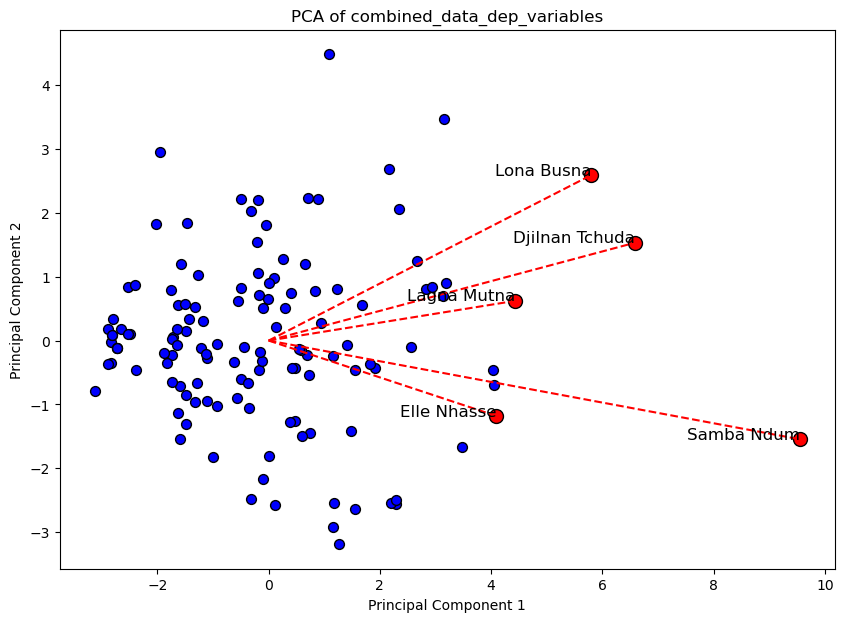

In [4]:
# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

# # Poner lista de las variables. 

# lista = ['Degree_Rede_EntreajudaLabur'	,'Indeg_Var.Dep_RedeControlExtAusencia'	,'Indeg_Var.Dep_ApoioSpecDiqCint',	'Indeg_Var.Dep_ApoioSpecTubos'	,'Indeg_Var.Dep_RedApoiLevntDiCin',	'Indeg_RedCont_DiqPriqDiqCint'	,'Indeg_RedeRepar_DiqPriqDiqCint',	'Indeg_Red-Val_Cont1Rep2DiqCin'	,'Indeg_Red-Val_Cont1Rep2DiqPrq'	,'Indeg_ContRep2_DiqPrqCin'	,'Indeg_Var.Dep_RedePartilhaAgu']

# data_frame = data_frame_combinado['A','B'] # Estas son las variables

# Realizar el PCA
pca = PCA(n_components=2)  # Cambia n_components según tus necesidades
principal_components = pca.fit_transform(data_scaled)

# Crear un DataFrame con los componentes principales
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['id'] = data_frame_combinado_dep_grouped['id']

# Mostrar las primeras filas del DataFrame de componentes principales
print(principal_df.head())

# Seleccionar los IDs más relevantes (por ejemplo, los 5 valores absolutos más altos de PC1). OJO: si quiere explorar más debes cambiar este valor. 
top_n = 5
top_ids = principal_df.nlargest(top_n, 'PC1')['id']

# Graficar los componentes principales
plt.figure(figsize=(10, 7))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c='blue', edgecolor='k', s=50)

# Añadir las líneas y etiquetas para los IDs más relevantes
for i in range(len(principal_df)):
    if principal_df.loc[i, 'id'] in top_ids.values:
        plt.scatter(principal_df.loc[i, 'PC1'], principal_df.loc[i, 'PC2'], c='red', edgecolor='k', s=100)
        plt.text(principal_df.loc[i, 'PC1'], principal_df.loc[i, 'PC2'], principal_df.loc[i, 'id'], fontsize=12, ha='right')
        plt.plot([0, principal_df.loc[i, 'PC1']], [0, principal_df.loc[i, 'PC2']], 'r--')

plt.title('PCA of combined_data_dep_variables')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(False)
plt.show()


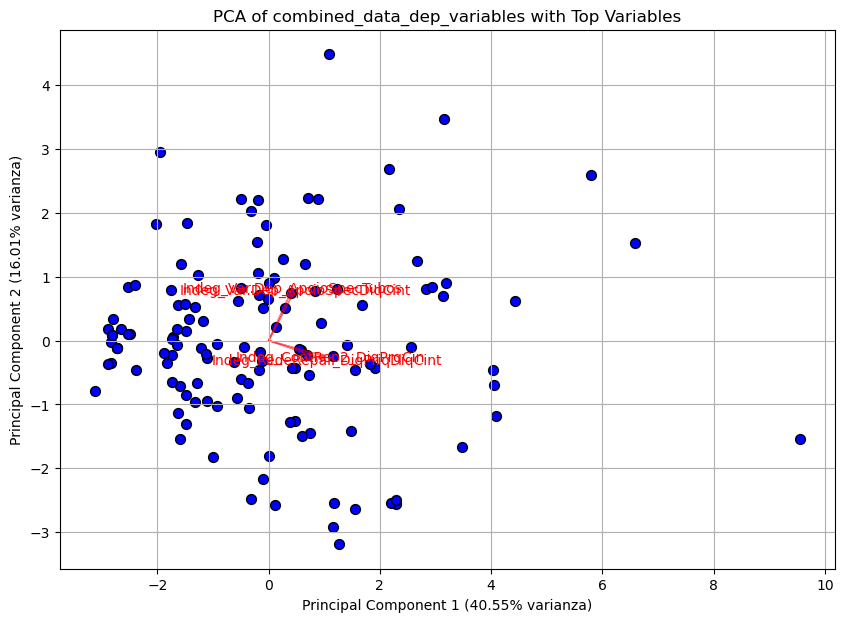

In [5]:
# Agrupar por 'id' y calcular la media (si es necesario)
data_frame_combinado_dep_grouped = data_frame_combinado.groupby('id').mean().reset_index().dropna()

# Eliminar la columna 'id' para realizar el PCA
data_for_pca = data_frame_combinado_dep_grouped.drop(columns=['id'])

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

# Realizar el PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Crear un DataFrame con los componentes principales
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['id'] = data_frame_combinado_dep_grouped['id']

# Calcular la contribución de cada variable a los componentes principales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Crear un DataFrame con los loadings
loading_df = pd.DataFrame(loadings, index=data_for_pca.columns, columns=['PC1', 'PC2'])

# Seleccionar las variables más relevantes (por ejemplo, las 5 con mayor contribución en PC1 y PC2). OJO: si quiere explorar más debes cambiar este valor. 
top_n = 2
top_vars_PC1 = loading_df['PC1'].abs().nlargest(top_n).index
top_vars_PC2 = loading_df['PC2'].abs().nlargest(top_n).index
top_vars = set(top_vars_PC1).union(set(top_vars_PC2))

# Graficar los componentes principales
plt.figure(figsize=(10, 7))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c='blue', edgecolor='k', s=50)

explained_var_ratio = pca.explained_variance_ratio_



# Añadir las líneas y etiquetas para las variables más relevantes
for var in top_vars:
    plt.arrow(0, 0, loading_df.loc[var, 'PC1'], loading_df.loc[var, 'PC2'], 
              color='red', alpha=0.5, head_width=0.05)
    plt.text(loading_df.loc[var, 'PC1'] * 1.15, loading_df.loc[var, 'PC2'] * 1.15, 
             var, color='red', ha='center', va='center')

plt.title('PCA of combined_data_dep_variables with Top Variables')
plt.xlabel(f'Principal Component 1 ({explained_var_ratio[0]*100:.2f}% varianza)')
plt.ylabel(f'Principal Component 2 ({explained_var_ratio[1]*100:.2f}% varianza)')
plt.grid(True)
plt.show()

In [6]:
data_frame_combinado_dep_grouped.head()

,id,Degree_Rede_EntreajudaLabur,Indeg_Var.Dep_RedeControlExtAusencia,Indeg_Var.Dep_ApoioSpecDiqCint,Indeg_Var.Dep_ApoioSpecTubos,Indeg_Var.Dep_RedApoiLevntDiCin,Indeg_RedCont_DiqPriqDiqCint,Indeg_RedeRepar_DiqPriqDiqCint,Indeg_Red-Val_Cont1Rep2DiqCin,Indeg_Red-Val_Cont1Rep2DiqPrq,Indeg_ContRep2_DiqPrqCin,Indeg_Var.Dep_RedePartilhaAgu
0,Aiace Quior,7.0,1.0,4.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
1,Alamada Bia,2.0,2.0,4.0,2.0,0.0,2.0,2.0,0.0,4.0,4.0,0.0
2,Alanghate Mfumba,10.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,3.0,3.0,0.0
3,Albat Calabus,10.0,0.0,2.0,0.0,0.0,2.0,2.0,0.0,4.0,4.0,0.0
4,Americano Mbunde,19.0,1.0,1.0,2.0,0.0,2.0,2.0,0.0,4.0,4.0,0.0


In [7]:
print(top_vars)

{'Indeg_Var.Dep_ApoioSpecTubos', 'Indeg_RedeRepar_DiqPriqDiqCint', 'Indeg_Var.Dep_ApoioSpecDiqCint', 'Indeg_ContRep2_DiqPrqCin'}


c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

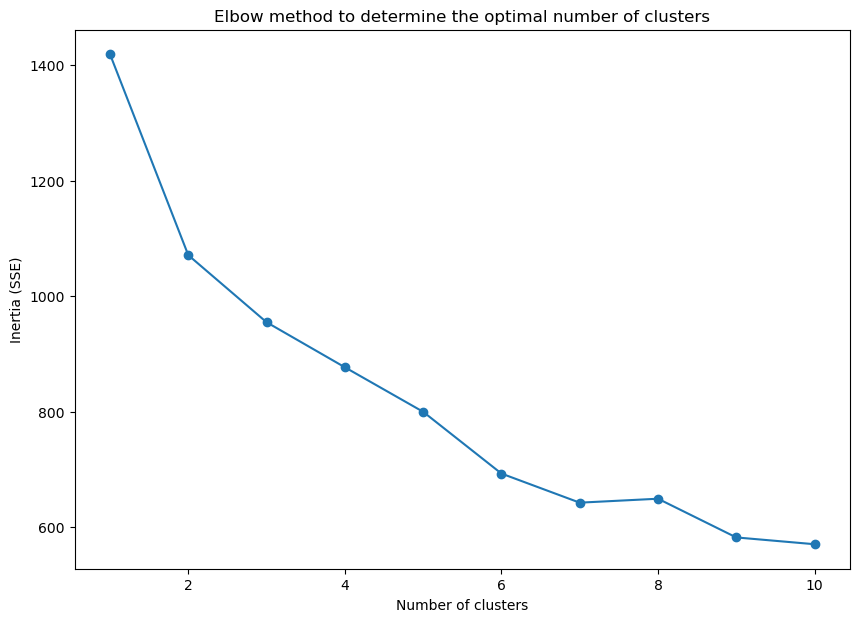

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Eliminar la columna 'id'
data_for_clustering = data_frame_combinado_dep_grouped.drop(columns=['id']).dropna()

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Determinar el número óptimo de clústeres usando el método del codo
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 7))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow method to determine the optimal number of clusters')
plt.show()


c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


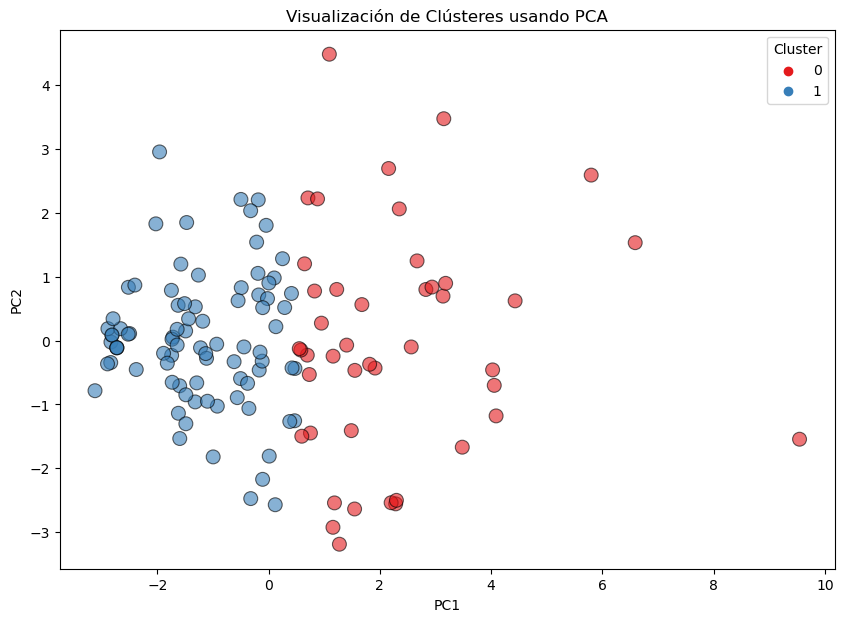

In [9]:
# Aplicar K-Means con el número óptimo de clústeres (elegir k basado en el gráfico del codo)
optimal_k = 2  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_frame_combinado_dep_grouped['Cluster'] = kmeans.fit_predict(data_scaled)

# Contar el número de elementos en cada clúster
cluster_counts = data_frame_combinado_dep_grouped['Cluster'].value_counts()

# Definir un umbral para los clústeres pequeños (por ejemplo, menos de 5 elementos)
threshold = 10
small_clusters = cluster_counts[cluster_counts < threshold].index

# Fusionar los clústeres pequeños en un clúster "otros"
data_frame_combinado_dep_grouped['Cluster'] = data_frame_combinado_dep_grouped['Cluster'].apply(lambda x: 'Otros' if x in small_clusters else x)

# Reducir la dimensionalidad a 2D para visualización
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Cluster'] = data_frame_combinado_dep_grouped['Cluster']

# Graficar los clústeres
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set1', data=principal_df, s=100, alpha=0.6, edgecolor='k')
plt.title('Visualización de Clústeres usando PCA')
plt.show()

### HACER DATAFRAME THE LOS GRUPOS DEL HCA

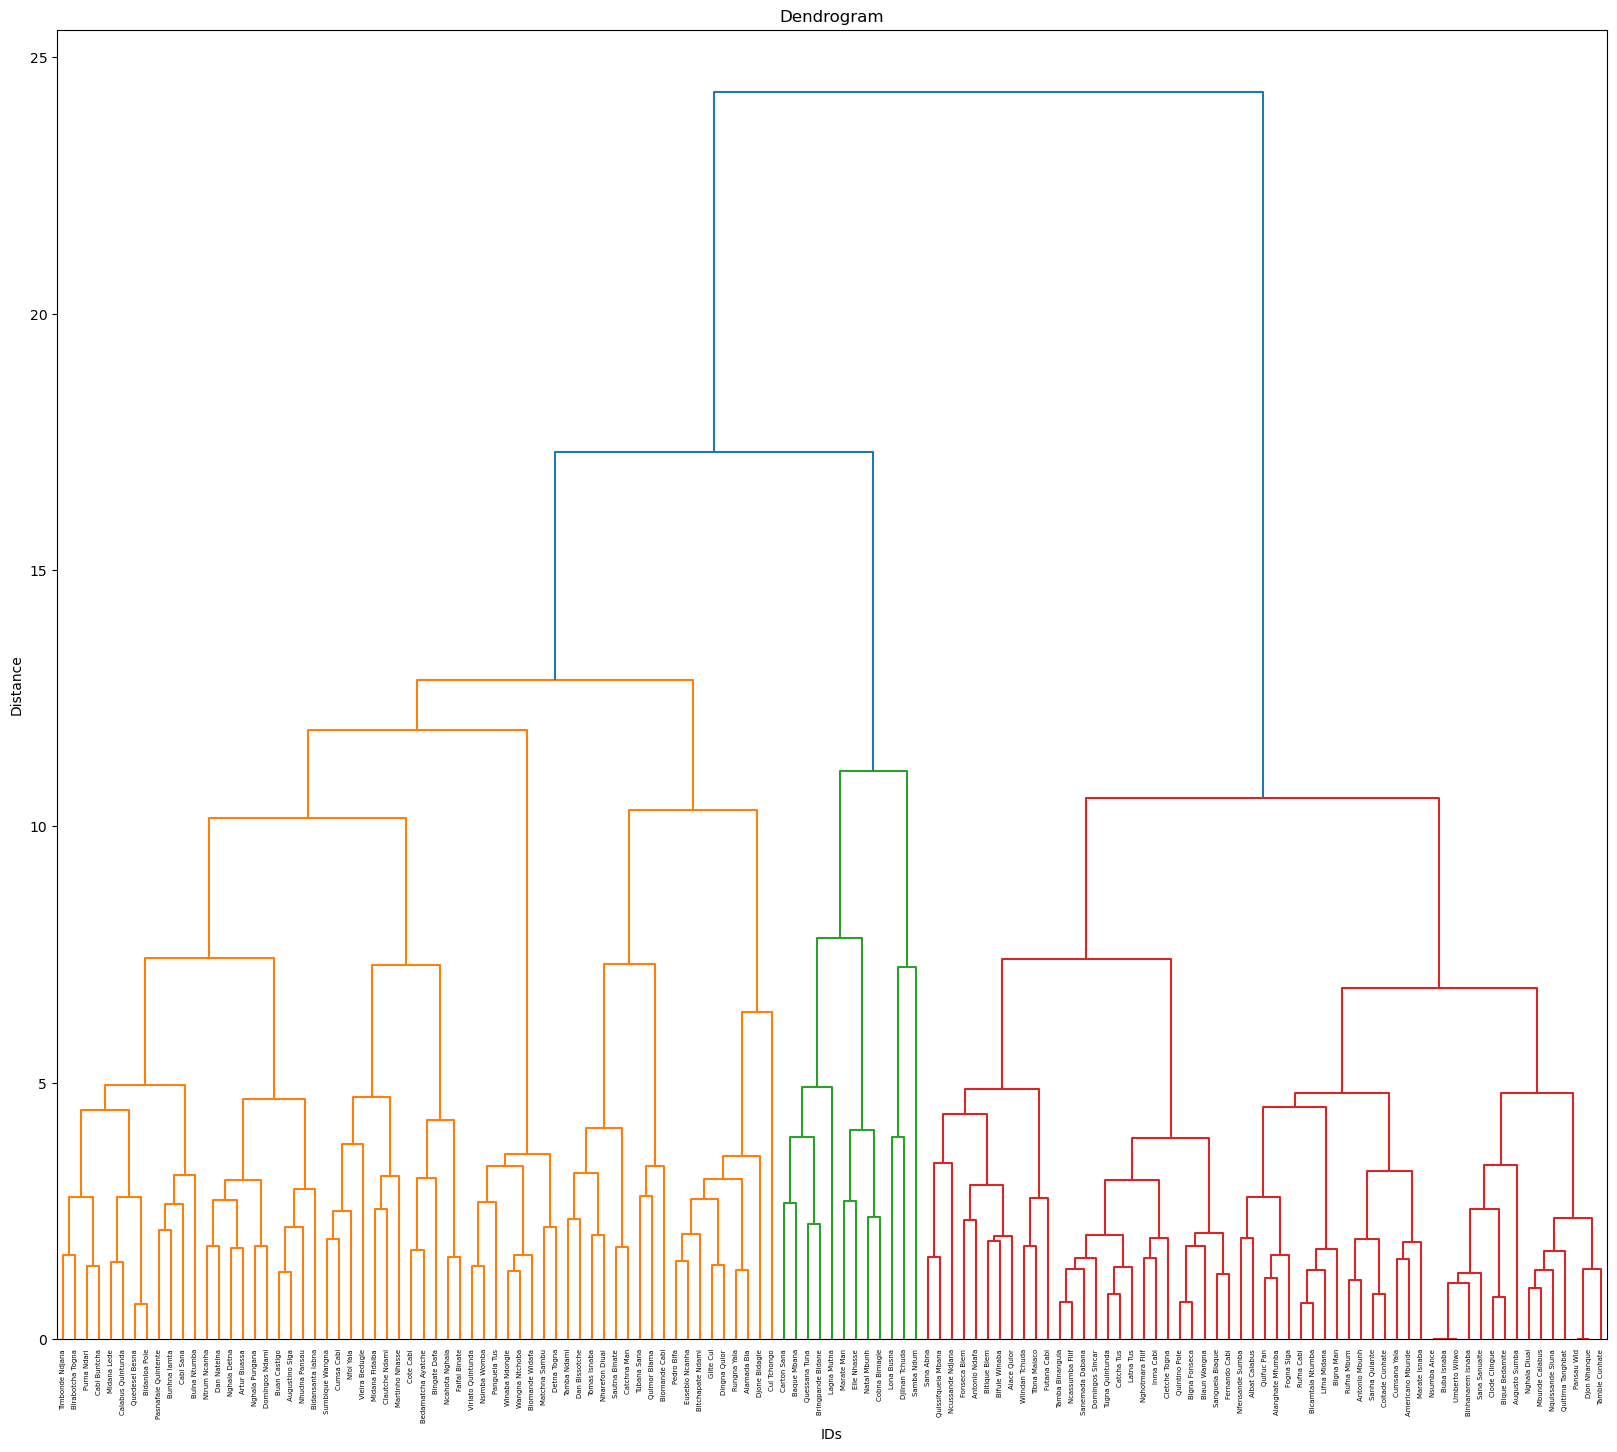

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Calcular el enlace para el dendrograma
linked = linkage(data_scaled, method='ward')

plt.figure(figsize=(20, 17))
dendrogram(linked, orientation='top', labels=data_frame_combinado_dep_grouped['id'].values, distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram')
plt.xlabel('IDs')
plt.ylabel('Distance')
plt.show()

## Exploratory analysis of independen data

In [54]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [55]:
data_frame_combinado_indep = pd.read_csv('../DataIntermediate/combined_data_indep_variables.csv', sep = ',')

data_frame_combinado_indep

,id,Degree_RedCo,Degree_RedeI,Indeg_PaiTi,Indeg_TiosM,Indeg_Intim,Indeg_RedeR,Degree_RedeC,Indeg_Venda,Indeg_Empre,...,1_VarExp_Moranca,2_VarExp_Atri_Tabanca,3_VarExp_Atri_Fanado,4_VarExp_Atri_CargosWM,5_VarExp_Atri_Idade,6_VarExp_Atri_ClassIdade,7_VarExp_Atri_IndForcaFugon,8_VarExp_Atri_IndInvestDiq,9_VarExp_Atri_IndMelhorTecnDiqCint,10_VarExp_Atri_MelhorTecnTubos
0,Aiace Quior,0,3,1,2,6,3,0,2,0,...,Atxugn,Ntchugal,0,0,53,2,1.0,3,3,0
1,Alamada Bia,0,0,0,0,1,0,0,0,0,...,Abicamba,Fanhi,0,0,37,2,1.0,1,0,0
2,Alanghate Mfumba,0,0,0,2,2,0,0,0,0,...,Ancanha,Bsoran,0,0,25,1,1.0,4,3,1
3,Albat Calabus,0,0,0,0,2,0,0,0,0,...,Antamba,Bsoran,1,0,48,2,2.0,4,3,0
4,Americano Mbunde,0,2,0,0,1,0,0,1,0,...,Agueien,Fanhi,0,0,30,1,1.0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Vieira Bedugle,3,0,0,0,7,7,0,0,0,...,Athua,Ntchugal,1,0,52,2,2.0,4,16,1
125,Viriato Quintunda,0,4,1,0,8,9,0,4,2,...,Abicuntche,Ntchugal,1,0,51,2,3.0,2,7,0
126,Wangna Ntchoba,0,0,0,0,2,4,0,0,0,...,Akbale,Ntchugal,1,0,78,3,2.0,1,1,0
127,Wilndan Tchuda,0,0,0,0,0,2,0,0,1,...,Anha,Ntchugal,1,0,52,2,1.0,4,3,0


In [56]:
# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Lista de columnas a transformar
columns_to_encode = ['1_VarExp_Moranca', '2_VarExp_Atri_Tabanca']

# Aplicar LabelEncoder a cada columna en la lista
for col in columns_to_encode:
    data_frame_combinado_indep[col] = label_encoder.fit_transform(data_frame_combinado_indep[col])

# Ahora las columnas '1_VarExp_Moranca' y '2_VarExp_Atri_Tabanca' están transformadas a números
print(data_frame_combinado_indep.head())

                 id  Degree_RedCo  Degree_RedeI  Indeg_PaiTi  Indeg_TiosM  \
0       Aiace Quior             0             3            1            2   
1       Alamada Bia             0             0            0            0   
2  Alanghate Mfumba             0             0            0            2   
3     Albat Calabus             0             0            0            0   
4  Americano Mbunde             0             2            0            0   

   Indeg_Intim  Indeg_RedeR  Degree_RedeC  Indeg_Venda  Indeg_Empre  ...  \
0            6            3             0            2            0  ...   
1            1            0             0            0            0  ...   
2            2            0             0            0            0  ...   
3            2            0             0            0            0  ...   
4            1            0             0            1            0  ...   

   1_VarExp_Moranca  2_VarExp_Atri_Tabanca  3_VarExp_Atri_Fanado  \
0           

In [57]:
# Agrupar por 'id' y calcular la media (si es necesario)
data_frame_combinado_indep_grouped = data_frame_combinado_indep.groupby('id').mean().reset_index()

# Eliminar la columna 'id' para realizar el PCA
data_for_pca = data_frame_combinado_indep_grouped.drop(columns=['id'])


data_frame_combinado_indep_grouped.head()

,id,Degree_RedCo,Degree_RedeI,Indeg_PaiTi,Indeg_TiosM,Indeg_Intim,Indeg_RedeR,Degree_RedeC,Indeg_Venda,Indeg_Empre,...,1_VarExp_Moranca,2_VarExp_Atri_Tabanca,3_VarExp_Atri_Fanado,4_VarExp_Atri_CargosWM,5_VarExp_Atri_Idade,6_VarExp_Atri_ClassIdade,7_VarExp_Atri_IndForcaFugon,8_VarExp_Atri_IndInvestDiq,9_VarExp_Atri_IndMelhorTecnDiqCint,10_VarExp_Atri_MelhorTecnTubos
0,Aiace Quior,0.0,3.0,1.0,2.0,6.0,3.0,0.0,2.0,0.0,...,56.0,2.0,0.0,0.0,53.0,2.0,1.0,3.0,3.0,0.0
1,Alamada Bia,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,37.0,2.0,1.0,1.0,0.0,0.0
2,Alanghate Mfumba,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,29.0,0.0,0.0,0.0,25.0,1.0,1.0,4.0,3.0,1.0
3,Albat Calabus,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,48.0,0.0,1.0,0.0,48.0,2.0,2.0,4.0,3.0,0.0
4,Americano Mbunde,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,22.0,1.0,0.0,0.0,30.0,1.0,1.0,2.0,1.0,0.0


        PC1       PC2                id
0  0.042505  0.177258       Aiace Quior
1 -2.248101 -0.506811       Alamada Bia
2 -2.664423 -1.539693  Alanghate Mfumba
3 -1.194245  1.570301     Albat Calabus
4 -1.765102 -1.632366  Americano Mbunde


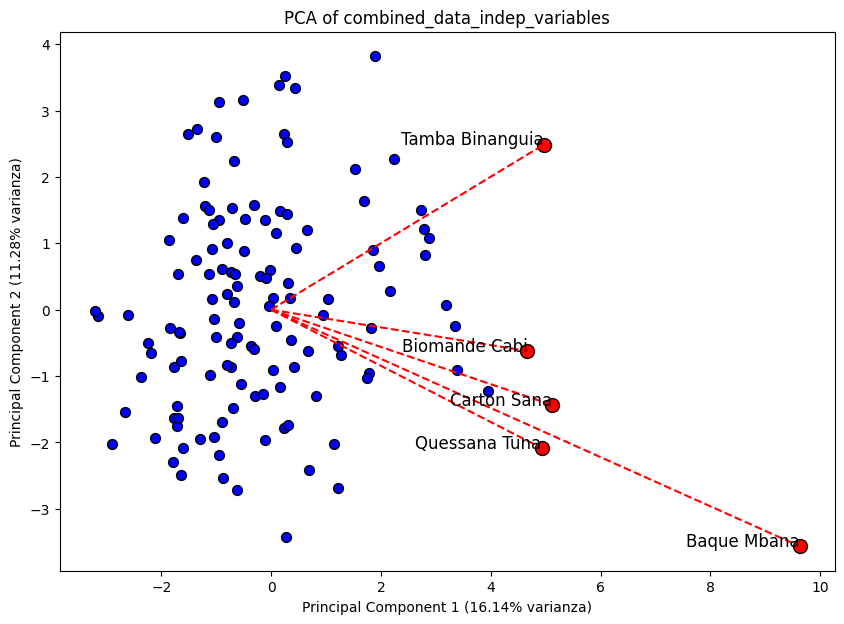

In [58]:

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

# Realizar el PCA
pca = PCA(n_components=2)  
principal_components = pca.fit_transform(data_scaled)

# Crear un DataFrame con los componentes principales
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['id'] = data_frame_combinado_indep_grouped['id']

# Mostrar las primeras filas del DataFrame de componentes principales
print(principal_df.head())

# Seleccionar los IDs más relevantes (por ejemplo, los 5 valores absolutos más altos de PC1). OJO: si quiere explorar más debes cambiar este valor. 
top_n = 5
top_ids = principal_df.nlargest(top_n, 'PC1')['id']

# Graficar los componentes principales
plt.figure(figsize=(10, 7))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c='blue', edgecolor='k', s=50)
explained_var_ratio = pca.explained_variance_ratio_


# Añadir las líneas y etiquetas para los IDs más relevantes
for i in range(len(principal_df)):
    if principal_df.loc[i, 'id'] in top_ids.values:
        plt.scatter(principal_df.loc[i, 'PC1'], principal_df.loc[i, 'PC2'], c='red', edgecolor='k', s=100)
        plt.text(principal_df.loc[i, 'PC1'], principal_df.loc[i, 'PC2'], principal_df.loc[i, 'id'], fontsize=12, ha='right')
        plt.plot([0, principal_df.loc[i, 'PC1']], [0, principal_df.loc[i, 'PC2']], 'r--')

plt.title('PCA of combined_data_indep_variables')
plt.xlabel(f'Principal Component 1 ({explained_var_ratio[0]*100:.2f}% varianza)')
plt.ylabel(f'Principal Component 2 ({explained_var_ratio[1]*100:.2f}% varianza)')

plt.grid(False)
plt.show()

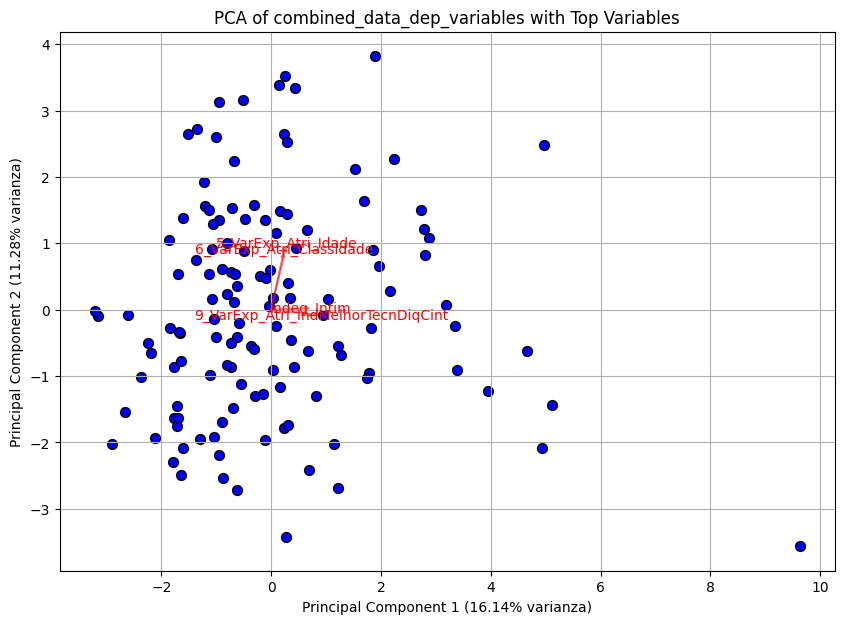

In [59]:
# Crear un DataFrame con los componentes principales
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['id'] = data_frame_combinado_indep_grouped['id']

# Calcular la contribución de cada variable a los componentes principales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Crear un DataFrame con los loadings
loading_df = pd.DataFrame(loadings, index=data_for_pca.columns, columns=['PC1', 'PC2'])

# Seleccionar las variables más relevantes (por ejemplo, las 5 con mayor contribución en PC1 y PC2)
top_n = 2
top_vars_PC1 = loading_df['PC1'].abs().nlargest(top_n).index
top_vars_PC2 = loading_df['PC2'].abs().nlargest(top_n).index
top_vars = set(top_vars_PC1).union(set(top_vars_PC2))

# Graficar los componentes principales
plt.figure(figsize=(10, 7))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c='blue', edgecolor='k', s=50)

# Añadir las líneas y etiquetas para las variables más relevantes
for var in top_vars:
    plt.arrow(0, 0, loading_df.loc[var, 'PC1'], loading_df.loc[var, 'PC2'], 
              color='red', alpha=0.5, head_width=0.05)
    plt.text(loading_df.loc[var, 'PC1'] * 1.15, loading_df.loc[var, 'PC2'] * 1.15, 
             var, color='red', ha='center', va='center')

plt.title('PCA of combined_data_dep_variables with Top Variables')
plt.xlabel(f'Principal Component 1 ({explained_var_ratio[0]*100:.2f}% varianza)')
plt.ylabel(f'Principal Component 2 ({explained_var_ratio[1]*100:.2f}% varianza)')
plt.grid(True)
plt.show()

In [60]:
print(top_vars)

{'5_VarExp_Atri_Idade', 'Indeg_Intim', '9_VarExp_Atri_IndMelhorTecnDiqCint', '6_VarExp_Atri_ClassIdade'}


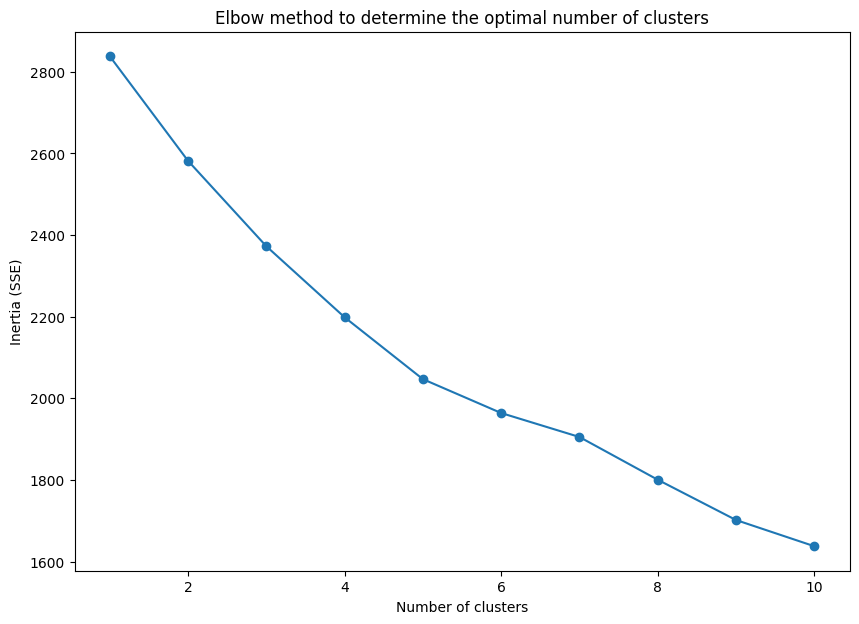

In [61]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Eliminar la columna 'id'
data_for_clustering = data_frame_combinado_indep_grouped.drop(columns=['id'])

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Determinar el número óptimo de clústeres usando el método del codo
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 7))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow method to determine the optimal number of clusters')
plt.show()



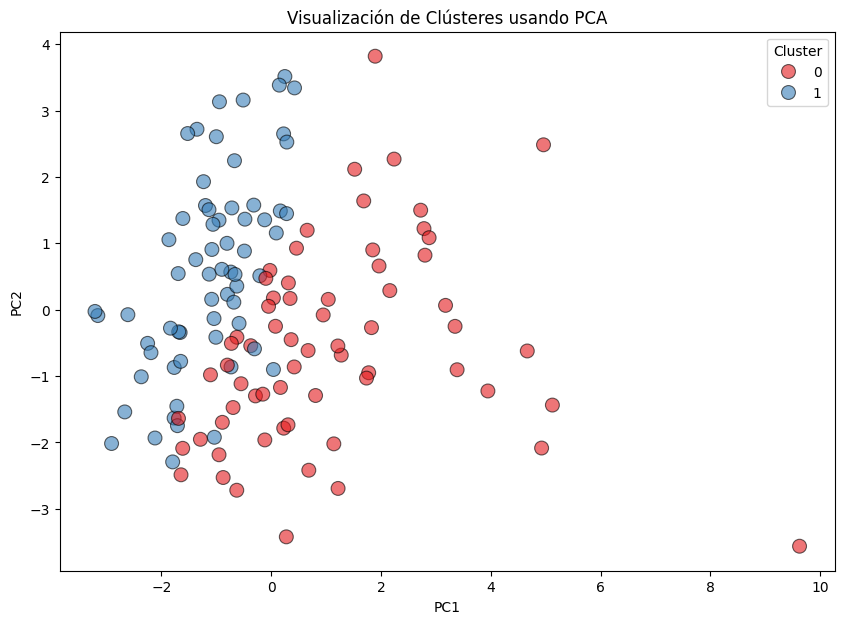

In [62]:
# Aplicar K-Means con el número óptimo de clústeres (elegir k basado en el gráfico del codo)
optimal_k = 2  # Reemplaza este valor con el número óptimo que determines del gráfico del codo
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_frame_combinado_indep_grouped['Cluster'] = kmeans.fit_predict(data_scaled)

# Contar el número de elementos en cada clúster
cluster_counts = data_frame_combinado_indep_grouped['Cluster'].value_counts()

# Definir un umbral para los clústeres pequeños (por ejemplo, menos de 5 elementos)
threshold = 5
small_clusters = cluster_counts[cluster_counts < threshold].index

# Fusionar los clústeres pequeños en un clúster "otros"
data_frame_combinado_indep_grouped['Cluster'] = data_frame_combinado_indep_grouped['Cluster'].apply(lambda x: 'Otros' if x in small_clusters else x)

# Reducir la dimensionalidad a 2D para visualización
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Cluster'] = data_frame_combinado_indep_grouped['Cluster']

# Graficar los clústeres
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set1', data=principal_df, s=100, alpha=0.6, edgecolor='k')
plt.title('Visualización de Clústeres usando PCA')
plt.show()

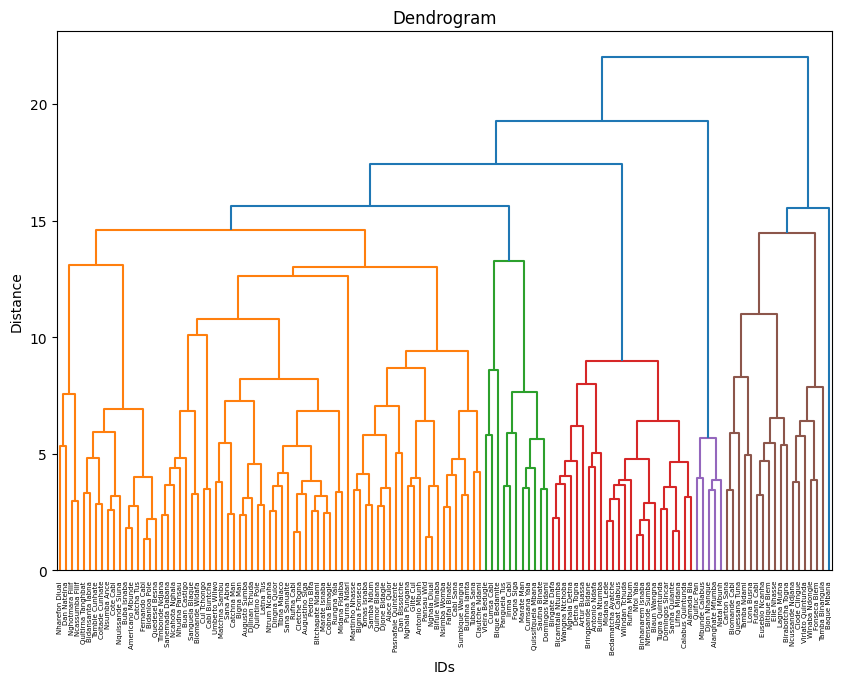

In [63]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Calcular el enlace para el dendrograma
linked = linkage(data_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=data_frame_combinado_indep_grouped['id'].values, distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram')
plt.xlabel('IDs')
plt.ylabel('Distance')
plt.show()

## PCA with all data

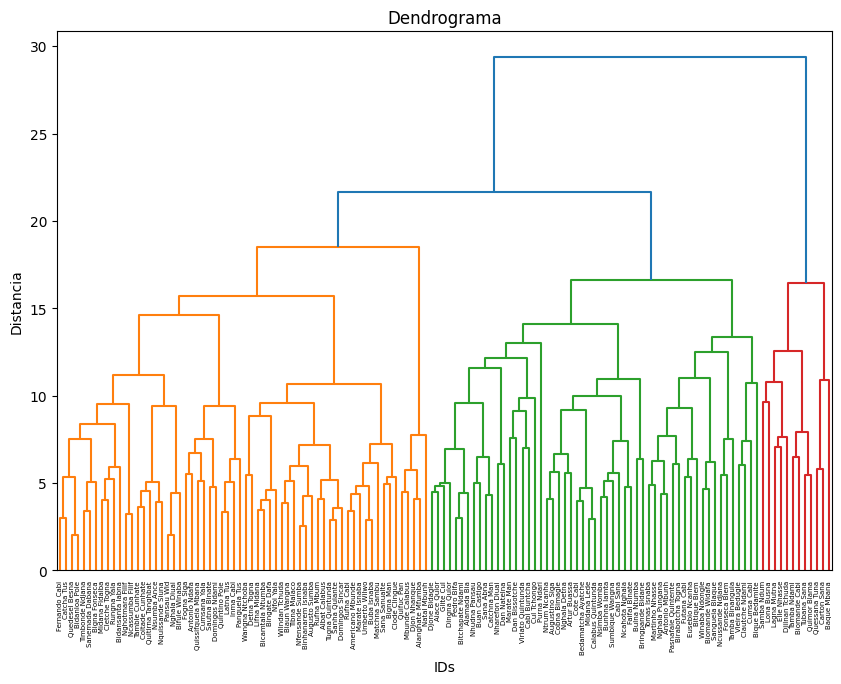

In [64]:
# Combinar los DataFrames utilizando la columna 'id'
combined_df = pd.merge(data_frame_combinado_indep, data_frame_combinado, on='id')

# Paso 2: Normalizar los Datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(combined_df.drop(columns=['id']))

# Paso 3: Clustering y Dendrograma
linked = linkage(data_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=combined_df['id'].values, distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma')
plt.xlabel('IDs')
plt.ylabel('Distancia')
plt.show()



In [65]:
# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['id'] = combined_df['id']

# Mostrar la contribución de cada componente principal
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Paso 5: Identificación de Variables Relevantes
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
num_vars = 5  # Número de variables más relevantes a mostrar
for i, (pc1, pc2) in enumerate(zip(loadings[:, 0], loadings[:, 1])):
    print(f'Variable: {combined_df.columns[i]}, PC1: {pc1:.2f}, PC2: {pc2:.2f}')


Explained Variance Ratio: [0.17908911 0.09086689]
Variable: id, PC1: 0.23, PC2: 0.06
Variable: Degree_RedCo, PC1: 0.45, PC2: -0.06
Variable: Degree_RedeI, PC1: 0.01, PC2: -0.24
Variable: Indeg_PaiTi, PC1: 0.21, PC2: -0.13
Variable: Indeg_TiosM, PC1: 0.42, PC2: 0.43
Variable: Indeg_Intim, PC1: 0.31, PC2: 0.57
Variable: Indeg_RedeR, PC1: 0.18, PC2: -0.03
Variable: Degree_RedeC, PC1: 0.09, PC2: 0.19
Variable: Indeg_Venda, PC1: 0.19, PC2: 0.11
Variable: Indeg_Empre, PC1: -0.48, PC2: -0.11
Variable: PC1_Dista, PC1: 0.23, PC2: -0.01
Variable: PC2_Dista, PC1: -0.21, PC2: -0.04
Variable: Avg_Distancia_Dist_, PC1: -0.15, PC2: 0.09
Variable: 1_VarExp_Moranca, PC1: 0.60, PC2: 0.14
Variable: 2_VarExp_Atri_Tabanca, PC1: -0.21, PC2: 0.49
Variable: 3_VarExp_Atri_Fanado, PC1: 0.40, PC2: 0.21
Variable: 4_VarExp_Atri_CargosWM, PC1: 0.08, PC2: 0.62
Variable: 5_VarExp_Atri_Idade, PC1: 0.08, PC2: 0.50
Variable: 6_VarExp_Atri_ClassIdade, PC1: 0.26, PC2: 0.38
Variable: 7_VarExp_Atri_IndForcaFugon, PC1: 0.27,

Variables más relevantes: Index(['Indeg_Red-Val_Cont1Rep2DiqPrq', 'Indeg_Var.Dep_RedApoiLevntDiCin'], dtype='object')


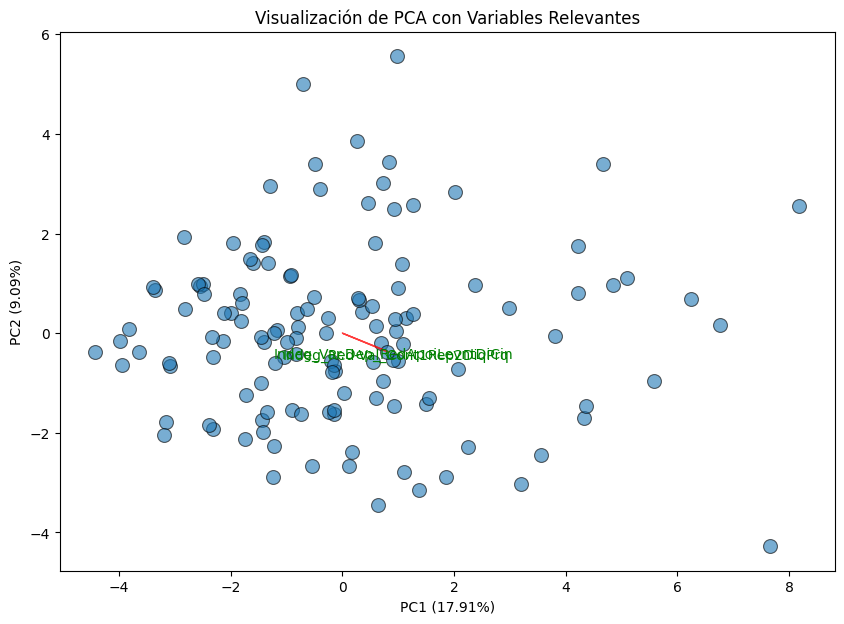

In [66]:
# Identificación de Variables Relevantes
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
num_vars = 2  # Número de variables más relevantes a mostrar

# Identificar las variables más relevantes
most_relevant_vars_indices = np.argsort(-np.abs(loadings[:, 0]))[:num_vars]
most_relevant_vars = combined_df.columns[most_relevant_vars_indices]
print("Variables más relevantes:", most_relevant_vars)

# Paso 6: Graficar PCA con las líneas de las variables más relevantes
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', data=principal_df, s=100, alpha=0.6, edgecolor='k')

# Añadir líneas de las variables más relevantes
for i in most_relevant_vars_indices:
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, combined_df.columns[i], color='g', ha='center', va='center')

plt.title('Visualización de PCA con Variables Relevantes')
plt.xlabel(f'PC1 ({explained_variance[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.2f}%)')
plt.grid(visible=False)
plt.show()

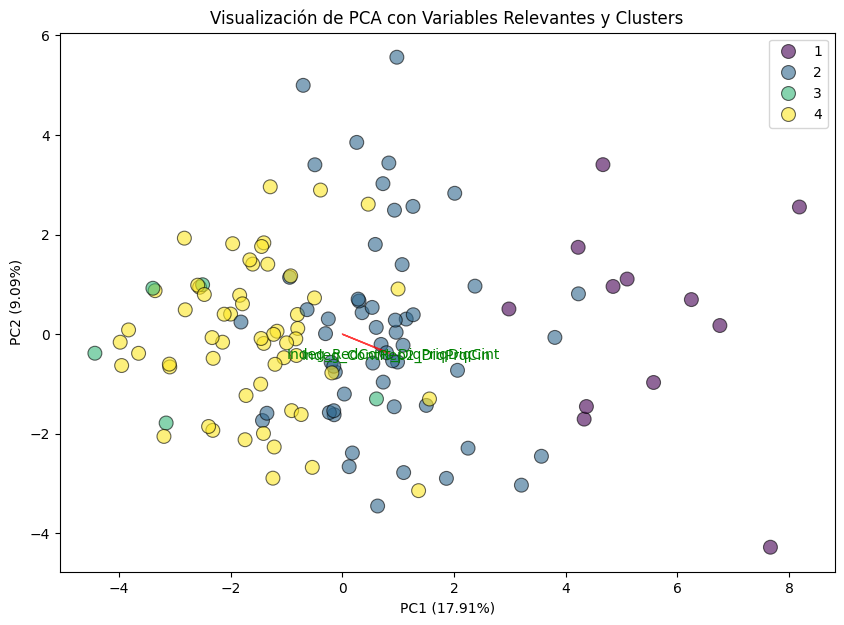

In [67]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Filtrar solo las columnas numéricas, excluyendo 'id'
numeric_df = combined_df.drop(columns=['id']).select_dtypes(include=[float, int]).copy()

# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)
# Clustering jerárquico
distance_matrix = pdist(scaled_data, metric='euclidean')
linked = linkage(distance_matrix, method='ward')
# Obtener los clusters
clusters = fcluster(linked, t=4, criterion='maxclust')  # Ajustar t según el número deseado de clusters

# Añadir los clusters al DataFrame principal
principal_df['Cluster'] = clusters

# Graficar PCA con las líneas de las variables más relevantes y los clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=principal_df, s=100, alpha=0.6, edgecolor='k', palette='viridis')

# Añadir líneas de las variables más relevantes
for i in most_relevant_vars_indices:
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, numeric_df.columns[i], color='g', ha='center', va='center')

plt.title('Visualización de PCA con Variables Relevantes y Clusters')
plt.xlabel(f'PC1 ({explained_variance[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.2f}%)')
plt.grid(visible=False)
plt.legend()
plt.show()

## Plots de las variables dependientes

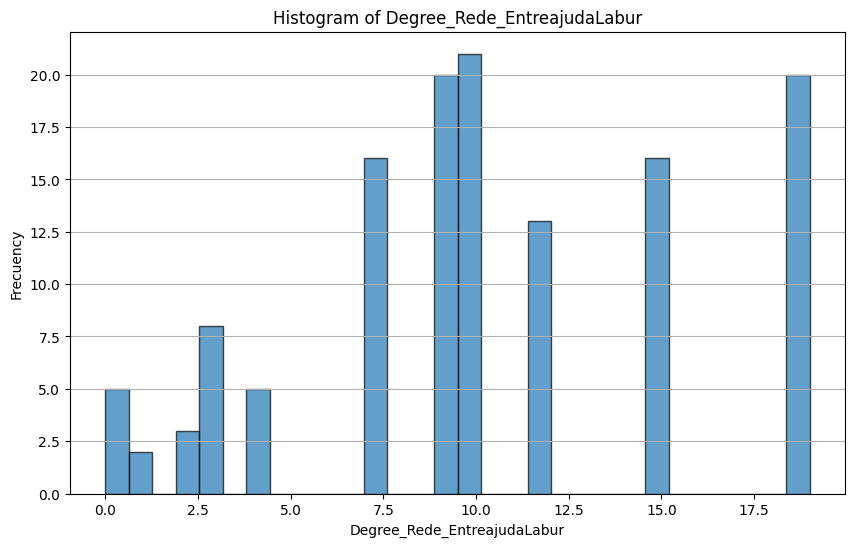

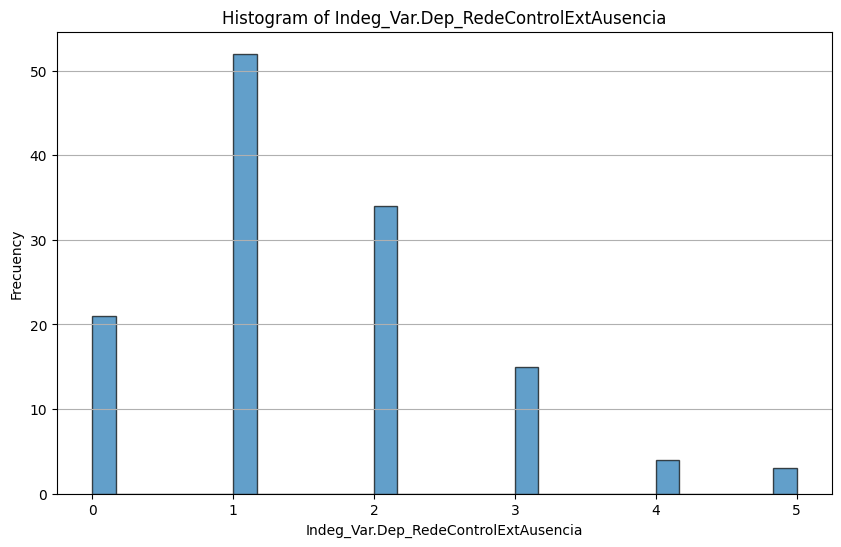

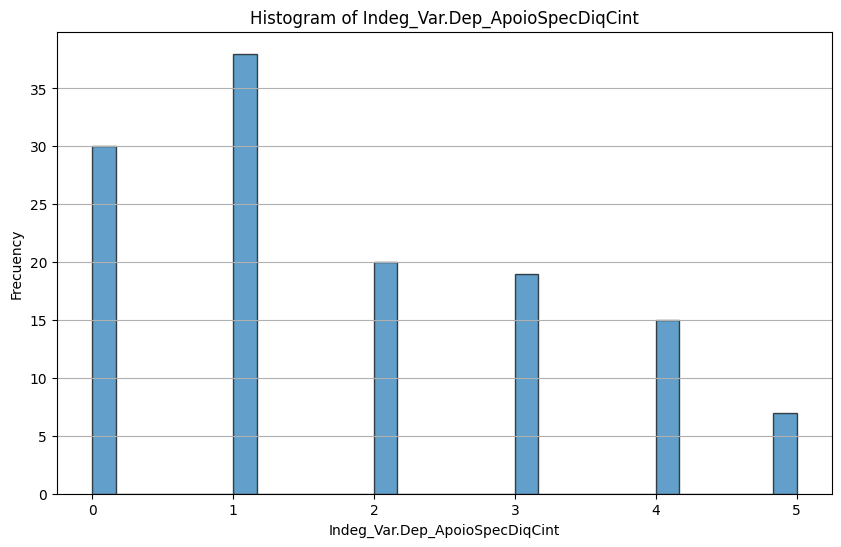

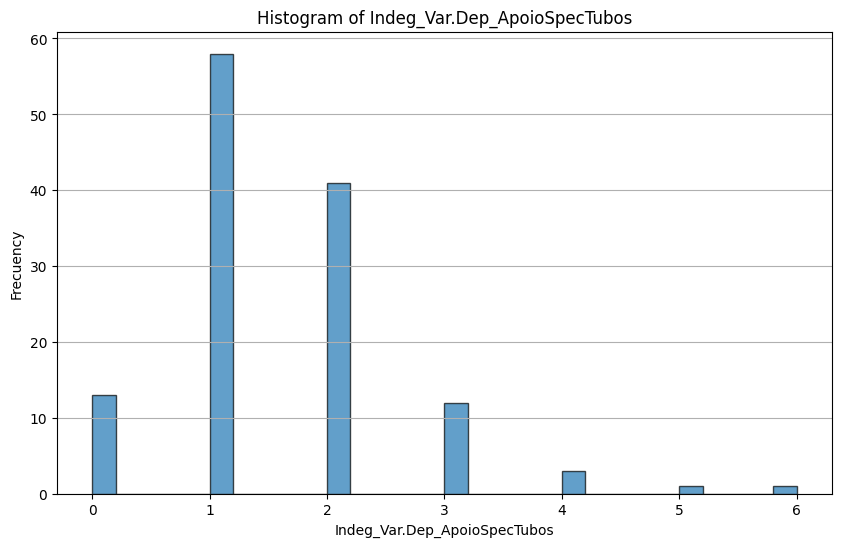

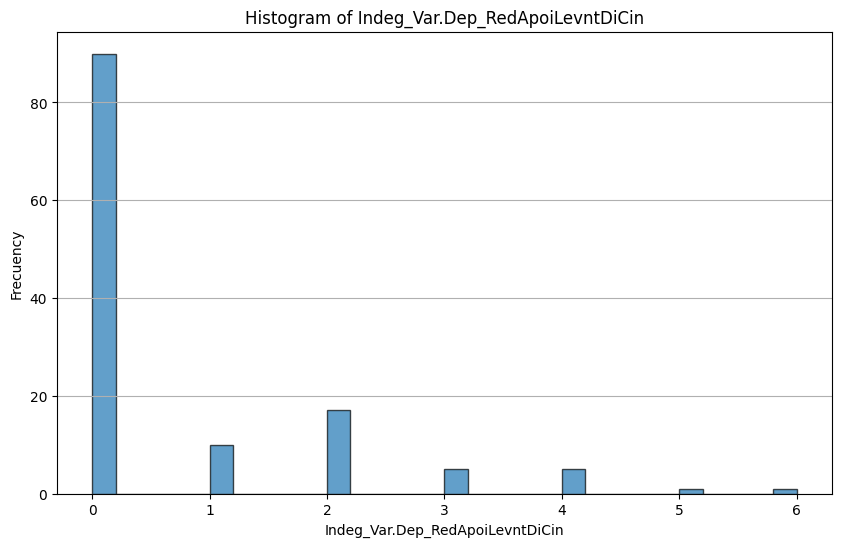

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Excluir la columna 'id'
dep_vars_df = data_frame_combinado.drop(columns=['id'])

# Seleccionar la cantidad de variables que deseas plotear
num_plots = 5  # Hermano, acá debe elegir cuántos plots quiere. Debe tener cuidado si pone muchos, se plotean todos. 

# Crear histogramas para cada variable dependiente seleccionada y guardarlos
selected_columns = dep_vars_df.columns[:num_plots]

for col in selected_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(dep_vars_df[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuency')
    plt.grid(axis='y')
    # plt.savefig(f'../DataIntermediate/histogram_{col}.png') # Si quiere guardar el plot, borra el primer # de esta fila.
    plt.show()


## Plots de las variables independientes

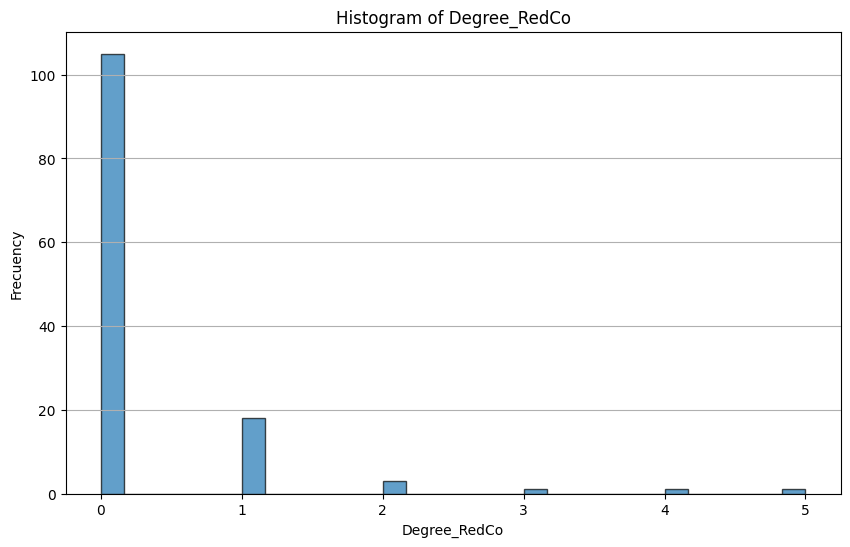

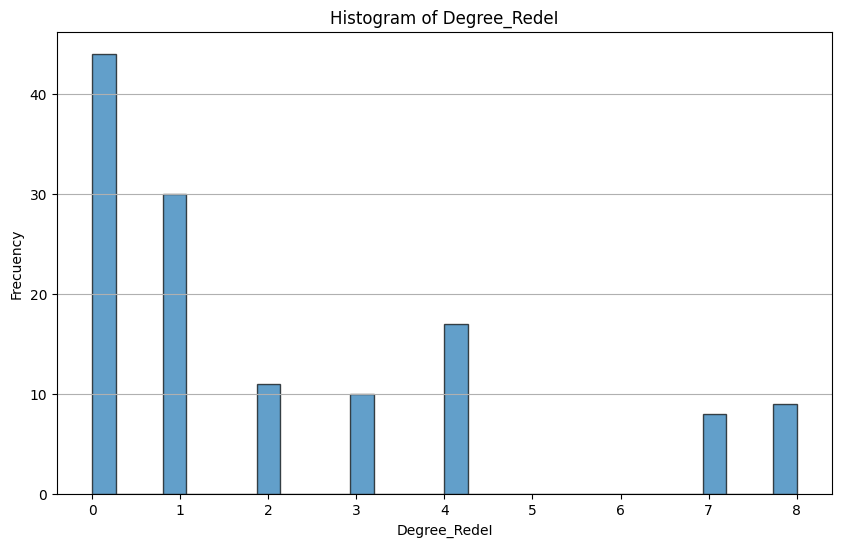

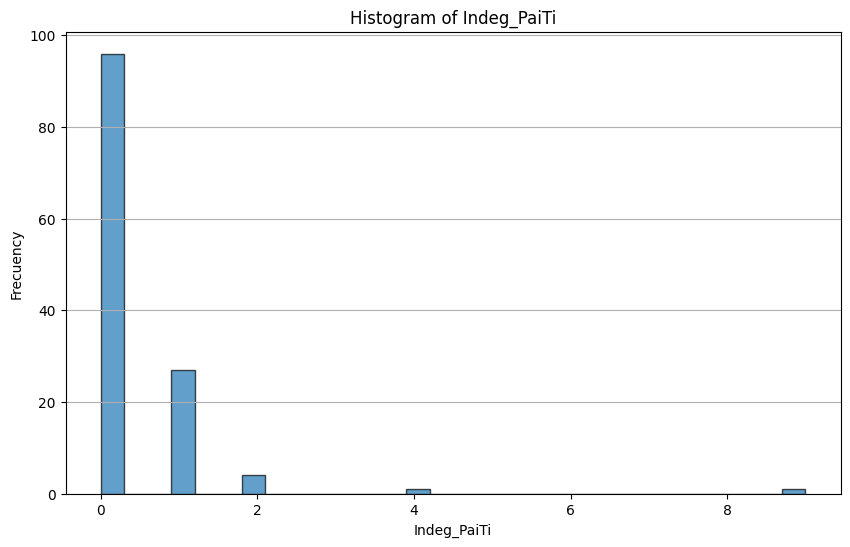

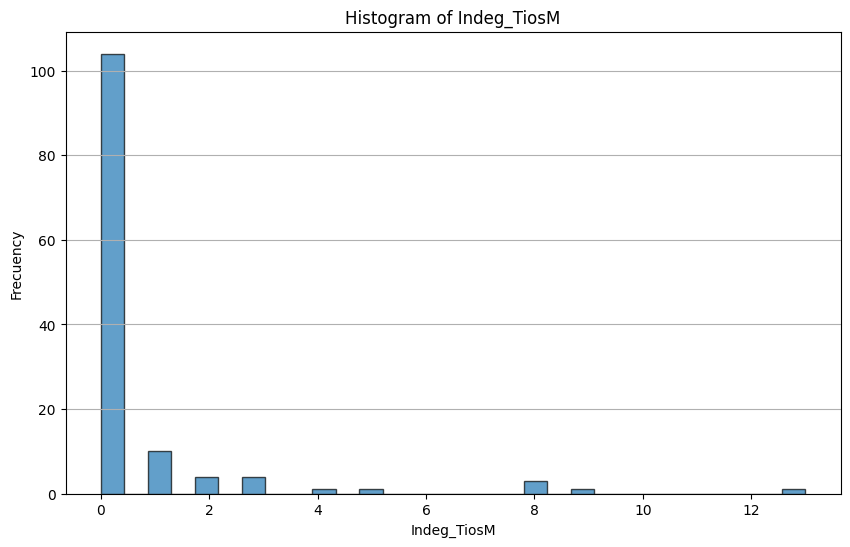

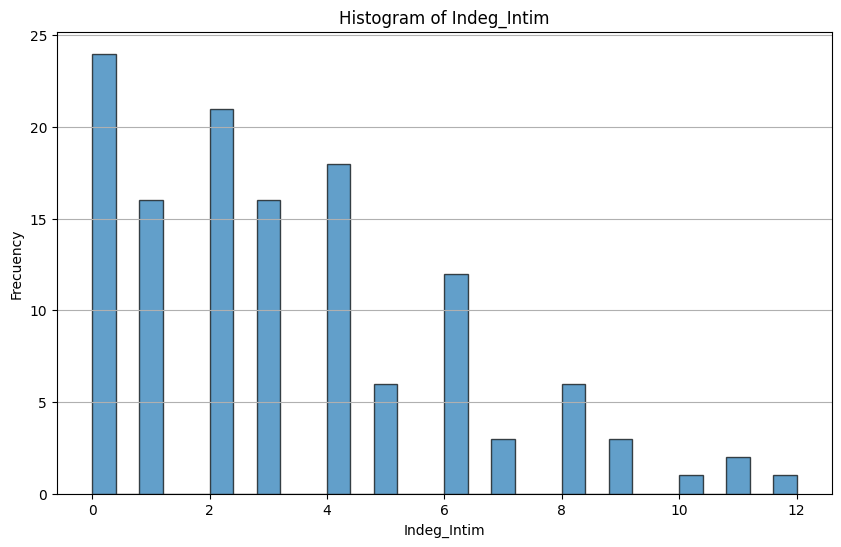

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Excluir la columna 'id'
dep_vars_df_indep = data_frame_combinado_indep.drop(columns=['id'])

# Seleccionar la cantidad de variables que deseas plotear
num_plots = 5  # Hermano, acá debe elegir cuántos plots quiere. Debe tener cuidado si pone muchos, se plotean todos. 

# Crear histogramas para cada variable dependiente seleccionada y guardarlos
selected_columns = dep_vars_df_indep.columns[:num_plots]

for col in selected_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(dep_vars_df_indep[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuency')
    plt.grid(axis='y')
    # plt.savefig(f'../DataIntermediate/histogram_{col}.png') # Si quiere guardar el plot, borra el primer # de esta fila.
    plt.show()


## Correlation between the variables

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer los DataFrames
data_frame_combinado_indep = pd.read_csv('../DataIntermediate/combined_data_indep_variables.csv', sep=',')
data_frame_combinado_dep = pd.read_csv('../DataIntermediate/combined_data_dep_variables.csv', sep=',')



In [71]:
# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Lista de columnas a transformar
columns_to_encode = ['1_VarExp_Moranca', '2_VarExp_Atri_Tabanca']

# Aplicar LabelEncoder a cada columna en la lista
for col in columns_to_encode:
    data_frame_combinado_indep[col] = label_encoder.fit_transform(data_frame_combinado_indep[col])




In [72]:
 #Eliminar la columna 'id' si está presente
data_frame_combinado_indep = data_frame_combinado_indep.drop(columns=['id'], errors='ignore')
data_frame_combinado_dep = data_frame_combinado_dep.drop(columns=['id'], errors='ignore')

# Calcular la matriz de correlación entre todas las variables
combined_df = pd.concat([data_frame_combinado_dep, data_frame_combinado_indep], axis=1)


In [73]:
print(data_frame_combinado_indep)

     Degree_RedCo  Degree_RedeI  Indeg_PaiTi  Indeg_TiosM  Indeg_Intim  \
0               0             3            1            2            6   
1               0             0            0            0            1   
2               0             0            0            2            2   
3               0             0            0            0            2   
4               0             2            0            0            1   
..            ...           ...          ...          ...          ...   
124             3             0            0            0            7   
125             0             4            1            0            8   
126             0             0            0            0            2   
127             0             0            0            0            0   
128             0             1            0            0            9   

     Indeg_RedeR  Degree_RedeC  Indeg_Venda  Indeg_Empre    PC1_Dista  ...  \
0              3             0   

In [74]:
print(data_frame_combinado_dep)

     Degree_Rede_EntreajudaLabur  Indeg_Var.Dep_RedeControlExtAusencia  \
0                              7                                     1   
1                              2                                     2   
2                             10                                     1   
3                             10                                     0   
4                             19                                     1   
..                           ...                                   ...   
124                            9                                     4   
125                           12                                     1   
126                           15                                     0   
127                            9                                     1   
128                            9                                     0   

     Indeg_Var.Dep_ApoioSpecDiqCint  Indeg_Var.Dep_ApoioSpecTubos  \
0                                 4       

In [75]:
combined_df.head()

,Degree_Rede_EntreajudaLabur,Indeg_Var.Dep_RedeControlExtAusencia,Indeg_Var.Dep_ApoioSpecDiqCint,Indeg_Var.Dep_ApoioSpecTubos,Indeg_Var.Dep_RedApoiLevntDiCin,Indeg_RedCont_DiqPriqDiqCint,Indeg_RedeRepar_DiqPriqDiqCint,Indeg_Red-Val_Cont1Rep2DiqCin,Indeg_Red-Val_Cont1Rep2DiqPrq,Indeg_ContRep2_DiqPrqCin,...,1_VarExp_Moranca,2_VarExp_Atri_Tabanca,3_VarExp_Atri_Fanado,4_VarExp_Atri_CargosWM,5_VarExp_Atri_Idade,6_VarExp_Atri_ClassIdade,7_VarExp_Atri_IndForcaFugon,8_VarExp_Atri_IndInvestDiq,9_VarExp_Atri_IndMelhorTecnDiqCint,10_VarExp_Atri_MelhorTecnTubos
0,7,1,4,2,1,1,0,1,1,1,...,56,2,0,0,53,2,1.0,3,3,0
1,2,2,4,2,0,2,2,0,4,4,...,1,1,0,0,37,2,1.0,1,0,0
2,10,1,0,0,0,2,1,0,3,3,...,29,0,0,0,25,1,1.0,4,3,1
3,10,0,2,0,0,2,2,0,4,4,...,48,0,1,0,48,2,2.0,4,3,0
4,19,1,1,2,0,2,2,0,4,4,...,22,1,0,0,30,1,1.0,2,1,0


In [76]:
corr_matrix = combined_df.corr()

# Extraer solo las correlaciones entre variables dependientes e independientes
corr_dep_indep = corr_matrix.loc[data_frame_combinado_dep.columns, data_frame_combinado_indep.columns]

print(corr_dep_indep)

                                      Degree_RedCo  Degree_RedeI  Indeg_PaiTi  \
Degree_Rede_EntreajudaLabur               0.039260     -0.098721    -0.068724   
Indeg_Var.Dep_RedeControlExtAusencia      0.208093      0.172227    -0.161917   
Indeg_Var.Dep_ApoioSpecDiqCint            0.110286      0.171345    -0.018902   
Indeg_Var.Dep_ApoioSpecTubos              0.004840      0.104755     0.031134   
Indeg_Var.Dep_RedApoiLevntDiCin          -0.000980      0.258543     0.022400   
Indeg_RedCont_DiqPriqDiqCint              0.103446      0.272210     0.072155   
Indeg_RedeRepar_DiqPriqDiqCint            0.056339      0.201051     0.047225   
Indeg_Red-Val_Cont1Rep2DiqCin             0.000352      0.281653    -0.020644   
Indeg_Red-Val_Cont1Rep2DiqPrq             0.092194      0.187165     0.118785   
Indeg_ContRep2_DiqPrqCin                  0.102036      0.252228     0.049747   
Indeg_Var.Dep_RedePartilhaAgu             0.093759      0.179890    -0.092127   

                           

In [77]:
# Umbral de correlación
threshold = 0.1

# Filtrar las correlaciones absolutas mayores al umbral y convertir a un DataFrame largo (long format)
high_corr = corr_dep_indep[corr_dep_indep.abs() > threshold].stack().reset_index()
high_corr.columns = ['Variable Dependiente', 'Variable Independiente', 'Correlación']

# Ordenar por la magnitud de la correlación
high_corr = high_corr.reindex(high_corr['Correlación'].abs().sort_values(ascending=False).index)

print("DataFrame con las correlaciones más altas:")
print(high_corr)



DataFrame con las correlaciones más altas:
                     Variable Dependiente              Variable Independiente  \
46        Indeg_Var.Dep_RedApoiLevntDiCin               2_VarExp_Atri_Tabanca   
24         Indeg_Var.Dep_ApoioSpecDiqCint               2_VarExp_Atri_Tabanca   
56           Indeg_RedCont_DiqPriqDiqCint                           PC1_Dista   
121         Indeg_Var.Dep_RedePartilhaAgu                         Indeg_RedeR   
91          Indeg_Red-Val_Cont1Rep2DiqCin  9_VarExp_Atri_IndMelhorTecnDiqCint   
..                                    ...                                 ...   
104              Indeg_ContRep2_DiqPrqCin                        Degree_RedCo   
67         Indeg_RedeRepar_DiqPriqDiqCint                           PC2_Dista   
101         Indeg_Red-Val_Cont1Rep2DiqPrq              4_VarExp_Atri_CargosWM   
10   Indeg_Var.Dep_RedeControlExtAusencia                         Indeg_Intim   
37           Indeg_Var.Dep_ApoioSpecTubos              4_VarExp_At

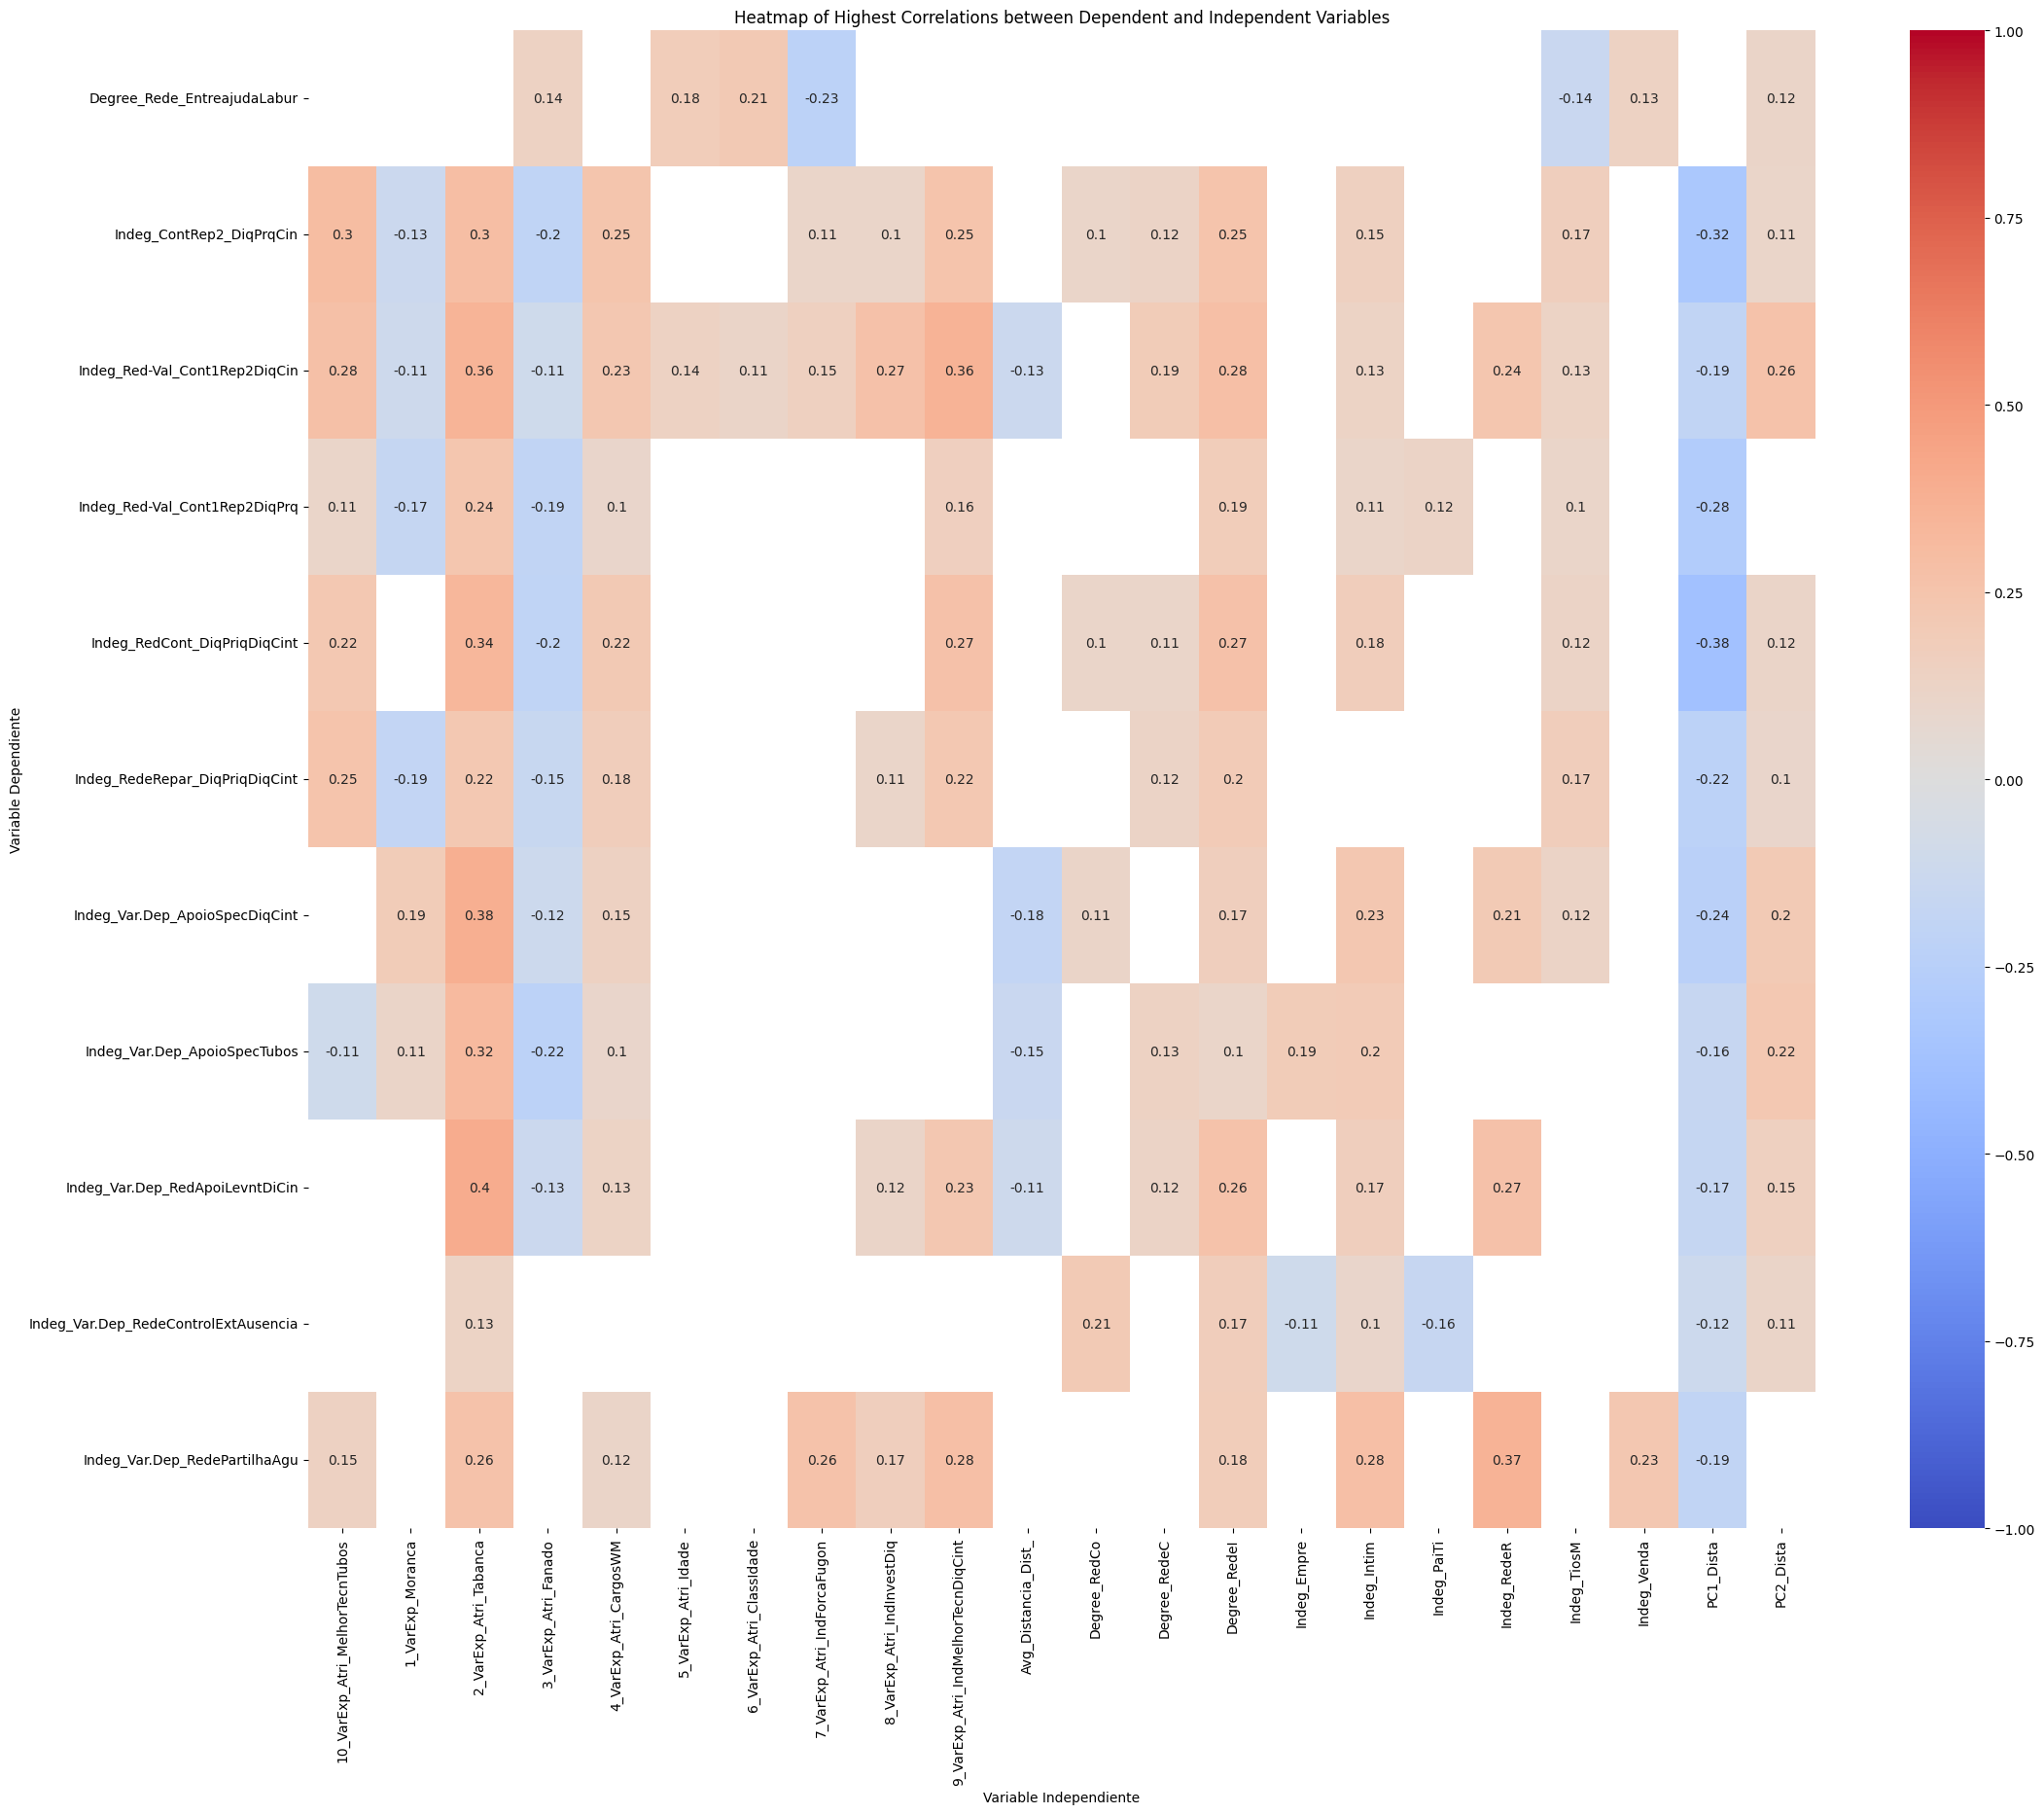

In [78]:
# Crear un DataFrame pivotado de high_corr
high_corr_pivot = high_corr.pivot_table(index='Variable Dependiente', columns='Variable Independiente', values='Correlación')

# Plot del heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(high_corr_pivot, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Heatmap of Highest Correlations between Dependent and Independent Variables')
plt.show()